## Status of chargepoint network

The data represent a snapshot of the status of the charge point network taken at five-minute intervals.Based on use case(s) around Occupancy can be derived 


In [1]:
#load libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
# reading with columns in Data dictionary
pointstats = pd.read_table('201907a.txt',encoding = "ISO-8859-1",names = ['Date','Time','ChargepointID','ChargepointType','Status','Coordinates','Address','Longitude','Latitude'])

In [3]:
# Display sample
pointstats

,Date,Time,ChargepointID,ChargepointType,Status,Coordinates,Address,Longitude,Latitude
0,20190701,1,CP:CBQYN,StandardType2,OOC,"-6.955983,52.702794","The Parade, Bagenalstown, County Carlow",-6.955983,52.702794
1,20190701,1,CP:C65QJ,StandardType2,Occ,"-6.923077,52.841045","Irish Rail, Railway Road, Carlow Town, County ...",-6.923077,52.841045
2,20190701,1,CP:C72G8,StandardType2,OOC,"-6.736986,52.801581","Inner Relief Road, Tullow, County Carlow",-6.736986,52.801581
3,20190701,1,CP:C7WLM,StandardType2,Part,"-6.972487,53.917571","Main Street, Bailieborough, County Cavan",-6.972487,53.917571
4,20190701,1,CP:C2YMD-A/B,StandardType2,OOS,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
...,...,...,...,...,...,...,...,...,...
1846931,20190725,1955,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1846932,20190726,825,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1846933,20190726,900,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1846934,20190727,1935,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


## Duplicates

In [4]:
#duplicate rows
pointstats.duplicated().sum()

38781

we have 38781 duplicates with the same values in the rows. remove them to make computing fast and to get accurate results.

In [5]:
#remove duplicate rows
pointstats = pointstats.drop_duplicates()

In [6]:
#checking duplicate rows
pointstats.duplicated().sum()

0

## Misssing values

In [7]:
pointstats.isna().sum()

Date                   0
Time                   0
ChargepointID      20948
ChargepointType      511
Status               511
Coordinates          511
Address              511
Longitude              0
Latitude               0
dtype: int64

In [8]:
#check missing values
(pointstats.isna().sum()/pointstats.shape[0])*100

Date               0.000000
Time               0.000000
ChargepointID      1.158529
ChargepointType    0.028261
Status             0.028261
Coordinates        0.028261
Address            0.028261
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [9]:
pointstats = pointstats.dropna(subset=['ChargepointType','Status','Coordinates','Latitude'])

In [10]:
pointstats.isna().sum()

Date                   0
Time                   0
ChargepointID      20437
ChargepointType        0
Status                 0
Coordinates            0
Address                0
Longitude              0
Latitude               0
dtype: int64

In [11]:
pointstats[pointstats.isna().any(axis=1)]

,Date,Time,ChargepointID,ChargepointType,Status,Coordinates,Address,Longitude,Latitude
7470,20190701,431,NaN,StandardType2,OOC,"-6.213815,53.280332","Stillorgan Luas Park & Ride, Blackthorn Drive,...",-6.213815,53.280332
7593,20190701,436,NaN,StandardType2,OOC,"-6.213815,53.280332","Stillorgan Luas Park & Ride, Blackthorn Drive,...",-6.213815,53.280332
7716,20190701,441,NaN,StandardType2,OOC,"-6.213815,53.280332","Stillorgan Luas Park & Ride, Blackthorn Drive,...",-6.213815,53.280332
10035,20190701,611,NaN,StandardType2,Part,"-7.498115,53.367976","The Square, Kilbeggan, County Westmeath",-7.498115,53.367976
10171,20190701,616,NaN,StandardType2,Part,"-7.498115,53.367976","The Square, Kilbeggan, County Westmeath",-7.498115,53.367976
...,...,...,...,...,...,...,...,...,...
1845996,20190731,2346,NaN,StandardType2,OOC,"-6.369887,53.285621","The Square Shopping Centre, Belgard Road, Tall...",-6.369887,53.285621
1846123,20190731,2351,NaN,StandardType2,Occ,"-9.456825,51.681417","Harbour View Car Park, Wolfe Tone Square, Bant...",-9.456825,51.681417
1846151,20190731,2351,NaN,StandardType2,OOC,"-6.369887,53.285621","The Square Shopping Centre, Belgard Road, Tall...",-6.369887,53.285621
1846278,20190731,2356,NaN,StandardType2,Occ,"-9.456825,51.681417","Harbour View Car Park, Wolfe Tone Square, Bant...",-9.456825,51.681417


In [12]:
pointstats[pointstats.isna().any(axis=1)].groupby(['Coordinates'])['ChargepointID'].count()

Coordinates
-6.169813,53.252775    0
-6.213815,53.280332    0
-6.240973,53.286679    0
-6.369887,53.285621    0
-6.507169,53.369508    0
-7.498115,53.367976    0
-9.456825,51.681417    0
Name: ChargepointID, dtype: int64

In [13]:
pointstats[pointstats.isna().any(axis=1)]['Coordinates'].unique()

array(['-6.213815,53.280332', '-7.498115,53.367976',
       '-6.507169,53.369508', '-6.369887,53.285621',
       '-6.240973,53.286679', '-6.169813,53.252775',
       '-9.456825,51.681417'], dtype=object)

In [14]:
pointstats[pointstats['Coordinates']=='-6.213815,53.280332']['ChargepointID'].unique()

array(['CP:C9QKW', nan], dtype=object)

In [15]:
pointstats[pointstats['Coordinates']=='-7.498115,53.367976']['ChargepointID'].unique()

array([nan], dtype=object)

In [16]:
pointstats[pointstats['Coordinates']=='-6.507169,53.369508']['ChargepointID'].unique()

array([nan], dtype=object)

In [17]:
pointstats[pointstats['Coordinates']=='-6.369887,53.285621']['ChargepointID'].unique()

array([nan], dtype=object)

In [18]:
pointstats[pointstats['Coordinates']=='-6.240973,53.286679']['ChargepointID'].unique()

array([nan], dtype=object)

In [19]:
pointstats[pointstats['Coordinates']=='-6.169813,53.252775']['ChargepointID'].unique()

array([nan], dtype=object)

In [20]:
pointstats[pointstats['Coordinates']=='-9.456825,51.681417']['ChargepointID'].unique()

array([nan], dtype=object)

so 
- '-6.213815,53.280332'   = 'CP:C9QKW'
- '-7.498115,53.367976'   = 'nan'
- '-6.507169,53.369508'   = 'nan'

and for remaining all we dont have ID values to fill

In [21]:
pointstats = pointstats.fillna('A')

from [here](https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas)

In [22]:
pointstats.loc[pointstats.Coordinates == '-6.213815,53.280332', 'ChargepointID'] = "CP:C9QKW"

In [23]:
pointstats.isna().sum()

Date               0
Time               0
ChargepointID      0
ChargepointType    0
Status             0
Coordinates        0
Address            0
Longitude          0
Latitude           0
dtype: int64

In [24]:
cleandata = pointstats[pointstats['ChargepointID'] != 'A']

In [25]:
cleandata.groupby(['ChargepointID']).size().reset_index().sort_values(0,ascending=False)

,ChargepointID,0
315,CP:C9QKW,28345
381,CP:RC15,21098
167,CP:C6H85,17908
376,CP:RC10,16578
382,CP:RC16,16535
...,...,...
391,CP:SC101,58
406,CP:SC116,56
65,CP:C4RD8,46
501,CP:SC69,4


In [26]:
cleandata[cleandata['Status']=="OOC"].groupby(['ChargepointID']).size().reset_index().sort_values(0,ascending=False)

,ChargepointID,0
268,CP:RC16,13116
267,CP:RC15,13071
269,CP:RC17,13023
97,CP:C6H85,11763
219,CP:C9QKW,9063
...,...,...
276,CP:SC106,1
287,CP:SC126,1
303,CP:SC16,1
299,CP:SC154,1


## change datatypes

In [27]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790300 entries, 0 to 1846424
Data columns (total 9 columns):
Date               int64
Time               int64
ChargepointID      object
ChargepointType    object
Status             object
Coordinates        object
Address            object
Longitude          float64
Latitude           float64
dtypes: float64(2), int64(2), object(5)
memory usage: 136.6+ MB


**Note**:-
- Date and time should be "Datetime" data type.

In [28]:
cleandata['Date'] = pd.to_datetime(cleandata['Date'],format='%Y%m%d')

In [29]:
cleandata['Time']

0             1
1             1
2             1
3             1
4             1
           ... 
1846420    2356
1846421    2356
1846422    2356
1846423    2356
1846424    2356
Name: Time, Length: 1790300, dtype: int64

In [30]:
cleandata['Time']  = pd.to_datetime(cleandata['Time'])

In [31]:
cleandata['Time']

0         1970-01-01 00:00:00.000000001
1         1970-01-01 00:00:00.000000001
2         1970-01-01 00:00:00.000000001
3         1970-01-01 00:00:00.000000001
4         1970-01-01 00:00:00.000000001
                       ...             
1846420   1970-01-01 00:00:00.000002356
1846421   1970-01-01 00:00:00.000002356
1846422   1970-01-01 00:00:00.000002356
1846423   1970-01-01 00:00:00.000002356
1846424   1970-01-01 00:00:00.000002356
Name: Time, Length: 1790300, dtype: datetime64[ns]

In [32]:
from datetime import datetime as dt

In [33]:
cleandata['Time'] = cleandata['Time'].astype(str)
#cleandata['Time']
cleandata['Time'] = cleandata['Time'].apply(lambda y:y[25:])

In [34]:
from datetime import datetime
z = cleandata['Time']
new = []
index=0
for i in z.values:
    
    #converting the string into list
    lis=list(i)
    #inserting the charactor :
    lis.insert(2,':')
    #inserting into new list
    new.append("".join(lis))

cleandata['time']  =new

In [35]:
cleandata['time'] = pd.to_datetime(cleandata['time'])
cleandata['time'] = cleandata['time'].dt.time

In [36]:
cleandata = cleandata[['Date','time','ChargepointID','ChargepointType','Status','Coordinates','Address','Longitude','Latitude']]

## final data

In [37]:
# final data
cleandata

,Date,time,ChargepointID,ChargepointType,Status,Coordinates,Address,Longitude,Latitude
0,2019-07-01,00:01:00,CP:CBQYN,StandardType2,OOC,"-6.955983,52.702794","The Parade, Bagenalstown, County Carlow",-6.955983,52.702794
1,2019-07-01,00:01:00,CP:C65QJ,StandardType2,Occ,"-6.923077,52.841045","Irish Rail, Railway Road, Carlow Town, County ...",-6.923077,52.841045
2,2019-07-01,00:01:00,CP:C72G8,StandardType2,OOC,"-6.736986,52.801581","Inner Relief Road, Tullow, County Carlow",-6.736986,52.801581
3,2019-07-01,00:01:00,CP:C7WLM,StandardType2,Part,"-6.972487,53.917571","Main Street, Bailieborough, County Cavan",-6.972487,53.917571
4,2019-07-01,00:01:00,CP:C2YMD-A/B,StandardType2,OOS,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
...,...,...,...,...,...,...,...,...,...
1846420,2019-07-31,23:56:00,CP:C9QKW,CHAdeMO,OOS,"-6.213815,53.280332","Stillorgan Luas Park & Ride, Blackthorn Drive,...",-6.213815,53.280332
1846421,2019-07-31,23:56:00,CP:C5R3K,CHAdeMO,OOC,"-9.507117,52.050650","Randles Garage (Nissan), Muckross Road, Killar...",-9.507117,52.050650
1846422,2019-07-31,23:56:00,CP:C8Y27,CHAdeMO,OOS,"-6.417955,53.932398","Applegreen Castlebellingham Services, M1 (Nort...",-6.417955,53.932398
1846423,2019-07-31,23:56:00,CP:CBHM9,CHAdeMO,OOS,"-6.289287,52.678070","Maxol Service Station, Arklow Road, Gorey, Cou...",-6.289287,52.678070


In [38]:
#cleandata1 = pd.read_table('xaa')
cleandata1 = pd.read_csv('xaa',encoding = "ISO-8859-1",names = ['Date','Time','ChargepointID','ChargepointType','Status','Coordinates','Address','Longitude','Latitude'])

In [39]:
cleandata1.to_csv('cleandata1.csv')

In [40]:
data1map = pd.DataFrame(cleandata.groupby(['ChargepointType','ChargepointID','Address','Longitude','Latitude']).size())

In [41]:
data1map.to_csv('data1map.csv')

In [42]:
hi = pd.DataFrame(cleandata.groupby(['ChargepointID','Latitude','Longitude'])['Status'].size())

In [43]:
hi = hi.reset_index()

In [44]:
hi = hi.drop_duplicates(subset='ChargepointID', keep="first")

In [45]:
hi = hi.drop('Status',axis = 1)

In [46]:
hi

,ChargepointID,Latitude,Longitude
0,CP:C24JY,53.625600,-7.466100
1,CP:C256J,53.941292,-8.100110
2,CP:C25HY,53.941292,-8.100110
3,CP:C25W4,54.833245,-7.486630
4,CP:C2CWB-A/B,53.146359,-7.181829
...,...,...,...
526,CP:SC95,54.659146,-7.334948
527,CP:SC96,54.601591,-7.307725
528,CP:SC97,54.857101,-6.308798
529,CP:SC98,54.750814,-5.999819


In [47]:
hi.to_csv('onlyID.csv')

In [48]:
cleandata

,Date,time,ChargepointID,ChargepointType,Status,Coordinates,Address,Longitude,Latitude
0,2019-07-01,00:01:00,CP:CBQYN,StandardType2,OOC,"-6.955983,52.702794","The Parade, Bagenalstown, County Carlow",-6.955983,52.702794
1,2019-07-01,00:01:00,CP:C65QJ,StandardType2,Occ,"-6.923077,52.841045","Irish Rail, Railway Road, Carlow Town, County ...",-6.923077,52.841045
2,2019-07-01,00:01:00,CP:C72G8,StandardType2,OOC,"-6.736986,52.801581","Inner Relief Road, Tullow, County Carlow",-6.736986,52.801581
3,2019-07-01,00:01:00,CP:C7WLM,StandardType2,Part,"-6.972487,53.917571","Main Street, Bailieborough, County Cavan",-6.972487,53.917571
4,2019-07-01,00:01:00,CP:C2YMD-A/B,StandardType2,OOS,"-7.204457,53.863850","The Grove, Ballyjamesduff, County Cavan",-7.204457,53.863850
...,...,...,...,...,...,...,...,...,...
1846420,2019-07-31,23:56:00,CP:C9QKW,CHAdeMO,OOS,"-6.213815,53.280332","Stillorgan Luas Park & Ride, Blackthorn Drive,...",-6.213815,53.280332
1846421,2019-07-31,23:56:00,CP:C5R3K,CHAdeMO,OOC,"-9.507117,52.050650","Randles Garage (Nissan), Muckross Road, Killar...",-9.507117,52.050650
1846422,2019-07-31,23:56:00,CP:C8Y27,CHAdeMO,OOS,"-6.417955,53.932398","Applegreen Castlebellingham Services, M1 (Nort...",-6.417955,53.932398
1846423,2019-07-31,23:56:00,CP:CBHM9,CHAdeMO,OOS,"-6.289287,52.678070","Maxol Service Station, Arklow Road, Gorey, Cou...",-6.289287,52.678070


In [49]:
cleandata[['ChargepointID','Status','ChargepointType']]

,ChargepointID,Status,ChargepointType
0,CP:CBQYN,OOC,StandardType2
1,CP:C65QJ,Occ,StandardType2
2,CP:C72G8,OOC,StandardType2
3,CP:C7WLM,Part,StandardType2
4,CP:C2YMD-A/B,OOS,StandardType2
...,...,...,...
1846420,CP:C9QKW,OOS,CHAdeMO
1846421,CP:C5R3K,OOC,CHAdeMO
1846422,CP:C8Y27,OOS,CHAdeMO
1846423,CP:CBHM9,OOS,CHAdeMO


In [55]:
status_chargeid = pd.DataFrame(cleandata.groupby(['ChargepointID','Date','Status'])['Status'].count())

In [56]:
status_chargeid

Status
ChargepointID Date       Status        
CP:C24JY      2019-07-01 OOC          3
                         Occ         15
              2019-07-02 Occ         26
              2019-07-03 Occ         35
              2019-07-04 OOC          2
...                                 ...
CP:SC99       2019-07-19 Part        13
              2019-07-20 Part         4
              2019-07-23 Part        20
              2019-07-25 Part       130
              2019-07-29 Part        19

[20630 rows x 1 columns]

In [57]:
status_chargeid.columns = ['count']

In [59]:
status_chargeid = status_chargeid.reset_index()

In [61]:
status_chargeid.to_csv('Status_chargeid.csv')

In [62]:
chagtype_chargeid = pd.DataFrame(cleandata.groupby(['ChargepointID','Date','ChargepointType'])['ChargepointType'].count())

In [63]:
chagtype_chargeid.columns = ['count']

In [64]:
chagtype_chargeid = chagtype_chargeid.reset_index()

In [66]:
chagtype_chargeid.to_csv('Chagtype_chargeid.csv')

In [67]:
#cleandata1 = pd.read_table('xaa')
cleandata2 = pd.read_csv('xab',encoding = "ISO-8859-1",names = ['Date','Time','ChargepointID','ChargepointType','Status','Coordinates','Address','Longitude','Latitude'])

In [68]:
cleandata2.to_csv('cleandata2.csv')

In [69]:
cleandata.columns

Index(['Date', 'time', 'ChargepointID', 'ChargepointType', 'Status',
       'Coordinates', 'Address', 'Longitude', 'Latitude'],
      dtype='object')

In [70]:
cleandata.shape

(1790300, 9)

In [71]:
cleandata.isna().sum()

Date               0
time               0
ChargepointID      0
ChargepointType    0
Status             0
Coordinates        0
Address            0
Longitude          0
Latitude           0
dtype: int64

In [72]:
cleandata.to_csv('cleandata.csv')

In [73]:
cleandata['Address']

0                    The Parade, Bagenalstown, County Carlow
1          Irish Rail, Railway Road, Carlow Town, County ...
2                   Inner Relief Road, Tullow, County Carlow
3                   Main Street, Bailieborough, County Cavan
4                    The Grove, Ballyjamesduff, County Cavan
                                 ...                        
1846420    Stillorgan Luas Park & Ride, Blackthorn Drive,...
1846421    Randles Garage (Nissan), Muckross Road, Killar...
1846422    Applegreen Castlebellingham Services, M1 (Nort...
1846423    Maxol Service Station, Arklow Road, Gorey, Cou...
1846424    Fort Service Station, 234 Shore Road, Belfast,...
Name: Address, Length: 1790300, dtype: object

In [74]:
data = cleandata

# EDA

### DAte

In [75]:
print('********Observations******')
print("Minimum date we have is:",data['Date'].min())
print("Minimum date we have is:",data['Date'].max())
print('Overall data we have is of One month, i.e july 2019')

********Observations******
Minimum date we have is: 2019-07-01 00:00:00
Minimum date we have is: 2019-07-31 00:00:00
Overall data we have is of One month, i.e july 2019


In [76]:
data['Date'].unique()

array(['2019-07-01T00:00:00.000000000', '2019-07-02T00:00:00.000000000',
       '2019-07-03T00:00:00.000000000', '2019-07-04T00:00:00.000000000',
       '2019-07-05T00:00:00.000000000', '2019-07-06T00:00:00.000000000',
       '2019-07-07T00:00:00.000000000', '2019-07-08T00:00:00.000000000',
       '2019-07-09T00:00:00.000000000', '2019-07-10T00:00:00.000000000',
       '2019-07-11T00:00:00.000000000', '2019-07-12T00:00:00.000000000',
       '2019-07-13T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
       '2019-07-15T00:00:00.000000000', '2019-07-16T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
       '2019-07-19T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
       '2019-07-21T00:00:00.000000000', '2019-07-22T00:00:00.000000000',
       '2019-07-23T00:00:00.000000000', '2019-07-24T00:00:00.000000000',
       '2019-07-25T00:00:00.000000000', '2019-07-26T00:00:00.000000000',
       '2019-07-27T00:00:00.000000000', '2019-07-28

### time

In [77]:
data['time'].value_counts()

12:53:00    3452
12:58:00    3436
12:48:00    3426
12:13:00    3401
12:28:00    3400
            ... 
04:45:00     120
05:20:00     120
05:05:00     119
05:10:00     119
05:15:00     118
Name: time, Length: 1438, dtype: int64

([], <a list of 0 Text xticklabel objects>)

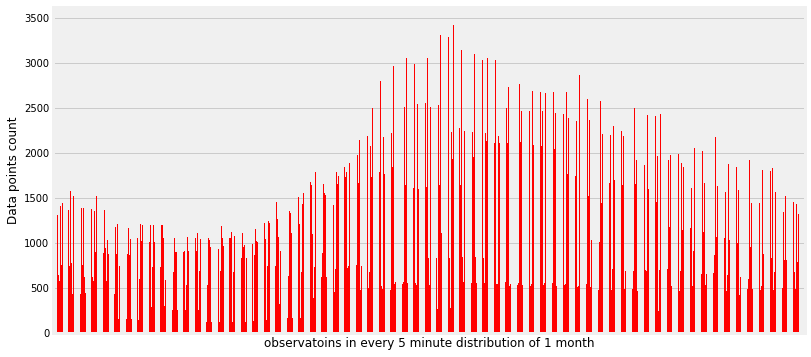

In [78]:
plt.figure(figsize =(12,6))
data['time'].value_counts().sort_index().plot(kind  = 'bar',cmap = 'autumn')
plt.xlabel('observatoins in every 5 minute distribution of 1 month')
plt.ylabel('Data points count')
plt.xticks([ ])

#### Observations:-
- time column in this data set is not telling any inference.
- but if the time says about the movement these information taken, then most of them are taken at afternoon.

### hour

In [79]:
data['hour'] = data['time'].astype(str).apply(lambda y:y[:2])

Text(0.5, 0, 'Observations in 24 hour distribution of 1 month')

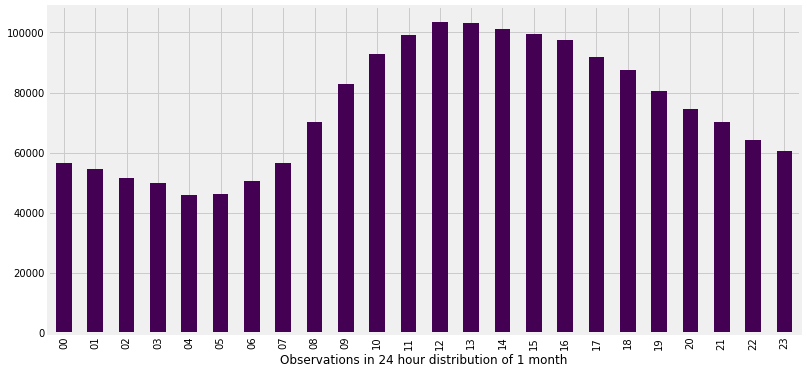

In [80]:
plt.figure(figsize = (12,6))
data['hour'].value_counts().sort_index().plot(kind = 'bar', cmap = 'viridis')
plt.xlabel('Observations in 24 hour distribution of 1 month')

### minutes

In [81]:
data['minutes'] = data['time'].astype(str).apply(lambda z :z[3:5])

Text(0.5, 0, 'Observation distribution for every Minute of 1 month')

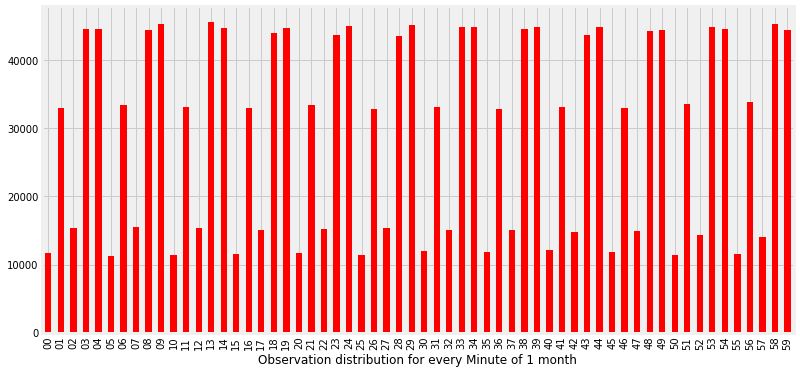

In [82]:
plt.figure(figsize = (12,6))
data['minutes'].value_counts().sort_index().plot(kind = 'bar', cmap = 'autumn')
plt.xlabel('Observation distribution for every Minute of 1 month')

## Charging pointID

In [83]:
data['ChargepointID'].value_counts()

CP:C9QKW    28345
CP:RC15     21098
CP:C6H85    17908
CP:RC10     16578
CP:RC16     16535
            ...  
CP:SC101       58
CP:SC116       56
CP:C4RD8       46
CP:SC37         4
CP:SC69         4
Name: ChargepointID, Length: 529, dtype: int64

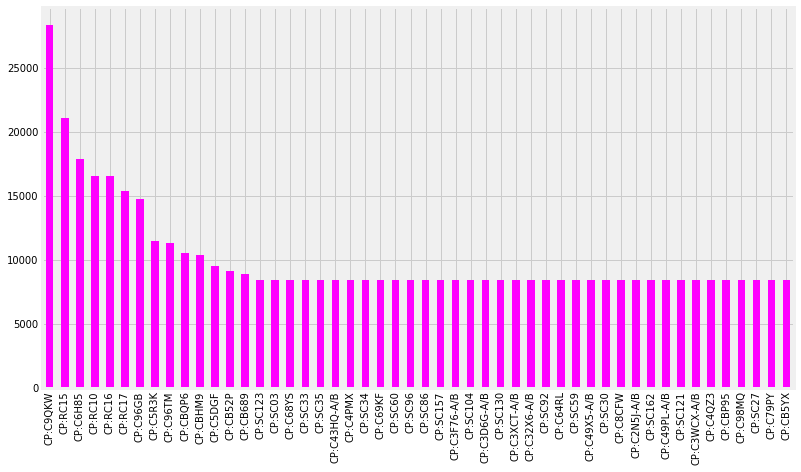

In [84]:
plt.figure(figsize = (12,7))
data['ChargepointID'].value_counts().head(50).plot(kind  = 'bar',cmap = 'spring')

#### Observations:-
- Top50 charging point ID based on the no of observations taken.
- Top3 charging point ID:-
    - CP:C9QKW
    - CP:RC15
    - CP:C6H85

### Chargepoint Type

In [85]:
data['ChargepointType'].value_counts()

StandardType2    1350024
CHAdeMO           187617
ComboCCS          153096
FastAC43           99563
Name: ChargepointType, dtype: int64

Text(0.5, 1.0, 'Types of ChargepointTypes')

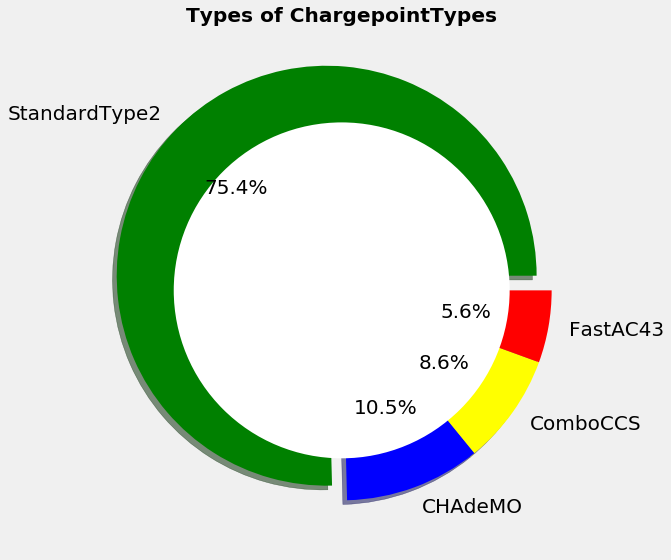

In [86]:
plt.style.use('fivethirtyeight')
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0)
colors = ['green','blue','yellow','red']

data['ChargepointType'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)
plt.ylabel('')

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Types of ChargepointTypes',weight = 'bold')

#### Observations:-
- most of the chargepoint type are of standard type2
- least chargepoint type is FastAC4

### status

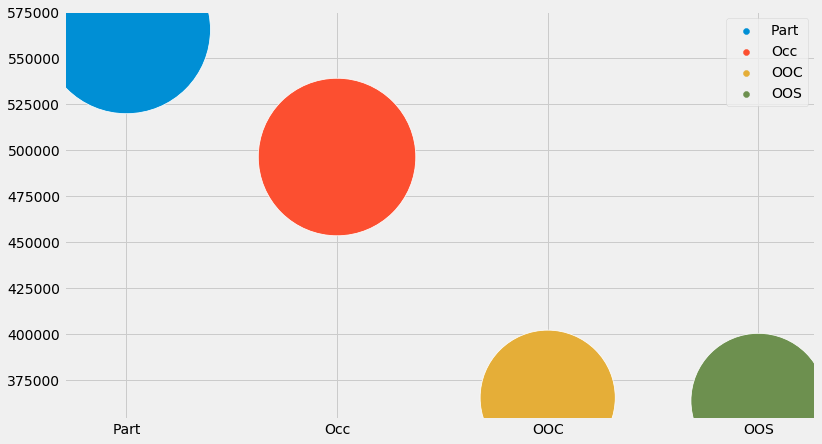

In [87]:
plt.figure(figsize = (12,7))

ss = data['Status'].value_counts().values/20
sns.scatterplot(x = data['Status'].value_counts().index,y= data['Status'].value_counts().values, data = data, hue = data['Status'].value_counts().index,s = ss)
#plt.title('Area vs No of observations')
#plt.xlabel('Areas')
#plt.ylabel('No of observations')
#plt.xticks(rotation= 90)

#### Observations:-
- Most of the observations are Partially occupied.

### Lat&Lon

In [88]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [89]:

heatmap = folium.Map(location=[53.1424, -7.6921], zoom_start = 6)

heat_data = [[row['Latitude'],row['Longitude']] for index, row in
             data[['Latitude', 'Longitude']][:3000].iterrows()]

hh =  HeatMap(heat_data).add_to(heatmap)


minimap = plugins.MiniMap(tile_layer=None,
    position='bottomright',
    width=150,
    height=150,
    collapsed_width=5,
    collapsed_height=5,
    zoom_level_offset=-5,#for minimap zoom
    zoom_level_fixed=None,
    center_fixed=False,
    zoom_animation=True,
    toggle_display=False,
    auto_toggle_display=False,
    minimized=False
)

heatmap.add_child(minimap)

heatmap

folium not able to show morethan 3000 points here on map. hence showing only 3000 data points.

In [90]:
colordict = {'StandardType2': 'red', 'CHAdeMO': 'blue', 'ComboCCS' : 'orange', 'FastAC43': 'red'}

In [91]:
latitude =53.1424
longitude =  -7.6921
traffic_map = folium.Map(location=[latitude, longitude])

In [92]:
for lat, lon, ChargepointType, Status in zip(data['Latitude'][:300], data['Longitude'][:300], data['ChargepointType'][:300], data['Status'][:300]):
    folium.CircleMarker(
        [lat, lon],
        popup = ('ChargepointType: ' + str(ChargepointType).capitalize() + '<br>'
                 'Status: ' + str(Status)),
        color='b',
        key_on = ChargepointType,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[ChargepointType],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
traffic_map

##### As this dataset is from ireland, i browse about this and got a webistet that shows all the "Ecar Charge points" in the map excatly similar to my dataset.

#### link [here](https://www.esb.ie/our-businesses/ecars/charge-point-map)

## use icons as shown in above link

## hour&Day vs status

#### Day vs status

In [93]:
Dast = pd.DataFrame(data.groupby(['Date','Status'])['Status'].count())
Dast.columns= ['Count']
Dast = Dast.reset_index()

In [94]:
Dast['Date'] = Dast['Date'].astype(str)

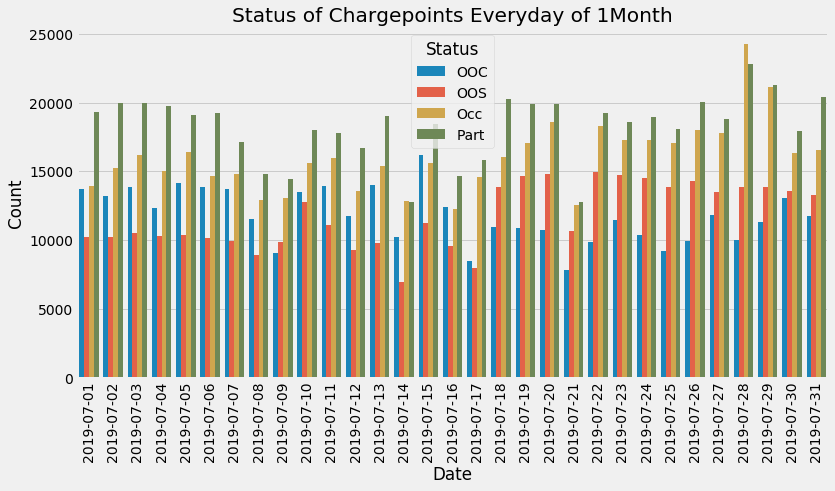

In [95]:
plt.figure(figsize = (12,6))
sns.barplot(x = Dast['Date'],y = Dast['Count'],hue = Dast['Status'])
plt.title('Status of Chargepoints Everyday of 1Month')
plt.xticks(rotation = '90')
plt.show()

#### Observations:-
- from above Everyday, most of the charge points are partially occupied.
- on 28th aug 2019 most of the available chargeponints are fully occupied.
- As the month end approaching Chargepoint are going out of service(red color bar increased at month end)


#### hour vs status

In [96]:
host = pd.DataFrame(data.groupby(['hour','Status'])['Status'].count())
host.columns = ['count']
host = host.reset_index()

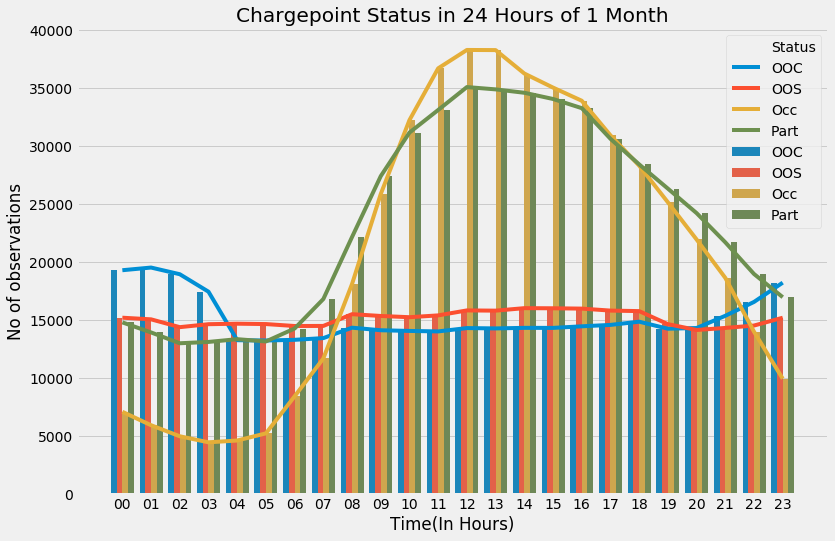

In [97]:
plt.figure(figsize = (12,8))

plt.title('Chargepoint Status in 24 Hours of 1 Month')
ax = fig.add_subplot(121)
sns.barplot(x = host['hour'],y = host['count'],hue = host['Status'])
plt.ylabel('No of observations')
plt.xlabel('Time(In Hours)')

ax = fig.add_subplot(122)
sns.lineplot(x = host['hour'],y = host['count'],hue = host['Status'])
plt.ylabel('No of observations')
plt.xlabel('Time(In Hours)')

plt.show()

#### Observations
- we can see that in 24 hours, at 10 AM to 17 PM we have chargepoint status Occupied more and is at peaks.
- trend of Occupied Chargepoint status increasing from 5Am and Decreasing after 1PM and also Chargepoints are Partially occupied at the same time.
- Trend of Out of service chargepoint statioins are static.



## Hour&day vs Chargepointtype

#### hour vs chargepointtype

In [98]:
hoch = pd.DataFrame(data.groupby(['hour','ChargepointType'])['ChargepointType'].count())
hoch.columns = ['Count']
hoch = hoch.reset_index()

Text(0.5, 1.0, 'Chargepoint types in 24 hours of 1 month ')

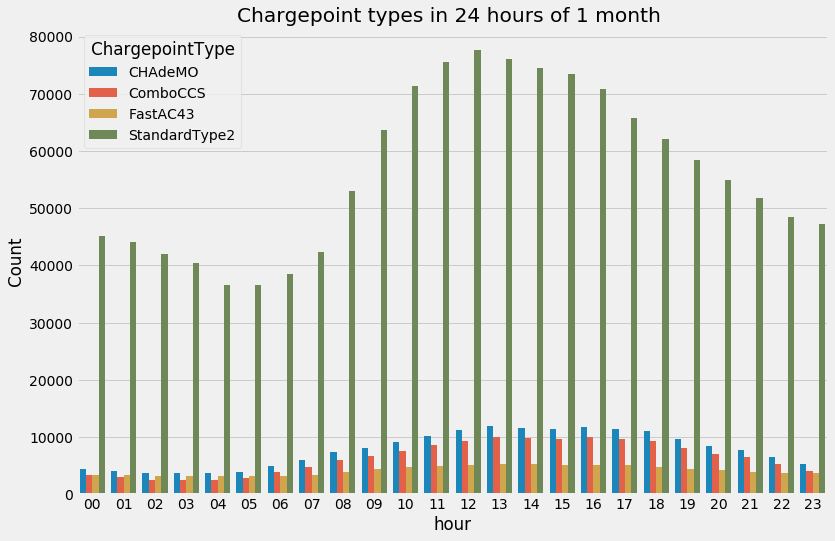

In [99]:
plt.figure(figsize = (12,8))
sns.barplot(x = hoch['hour'],y= hoch['Count'],hue = hoch['ChargepointType'])
plt.title('Chargepoint types in 24 hours of 1 month ')

#### Observations:-
- Most of the charge point Types are of "Standard type2"
- Top 3 chargepoint Types are 
    - Standard type2
    - CHAdeMO
    - ComboCCs

#### Day vs chargepointtype

In [100]:
dacha = pd.DataFrame(data.groupby(['Date','ChargepointType'])['ChargepointType'].count())
dacha.columns = ['count']
dacha = dacha.reset_index()

In [101]:
dacha['Date'] =  dacha['Date'].astype(str)

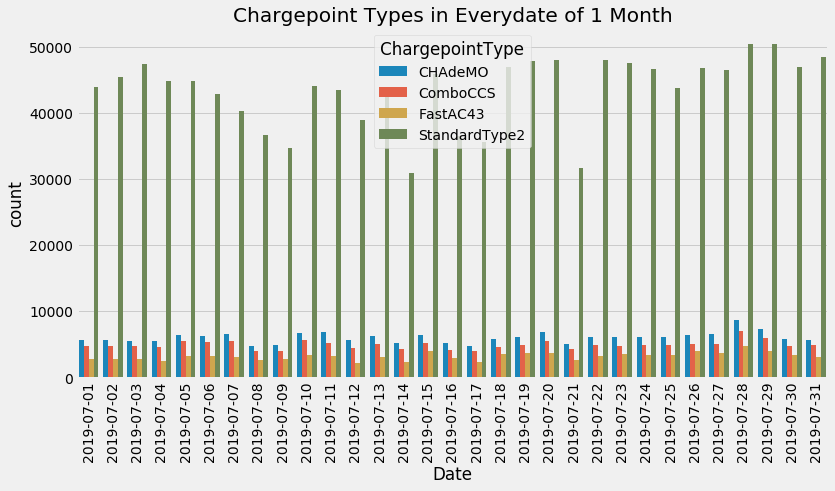

In [102]:
plt.figure(figsize = (12,6))

plt.title('Chargepoint Types in Everydate of 1 Month')
sns.barplot(x = 'Date',y = 'count',hue = 'ChargepointType',data = dacha)
plt.xticks(rotation = '90')

plt.show()

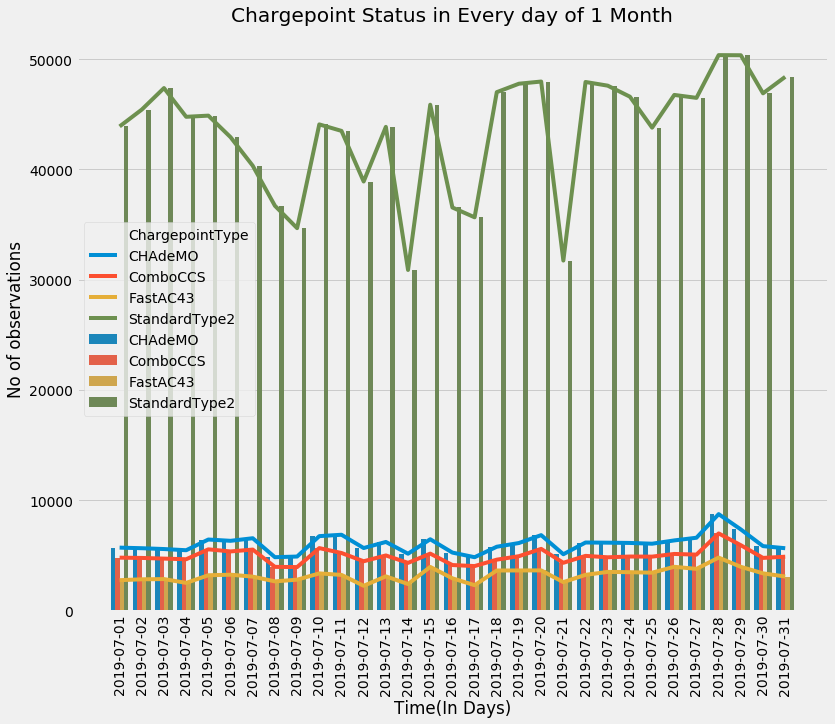

In [103]:
plt.figure(figsize = (12,10))

plt.title('Chargepoint Status in Every day of 1 Month')
ax = fig.add_subplot(121)
sns.barplot(x = 'Date',y = 'count',hue = 'ChargepointType',data = dacha)
plt.ylabel('No of observations')
plt.xlabel('Time(In Hours)')
plt.xticks(rotation = 90)

ax = fig.add_subplot(122)
sns.lineplot(x = 'Date',y = 'count',hue = 'ChargepointType',data = dacha)
plt.ylabel('No of observations')
plt.xlabel('Time(In Days)')
#plt.xticks([])

plt.show()

#### Observations:-
- we can see a random trend in Standard type charger usage in Each day of month.
- But the trend of using remaining 3 Charger types are moving paralell throught out the month.


## which type of charging points are getting out of service>?

In [104]:
#data[['ChargepointType','Status']]
chas = pd.DataFrame(data.groupby(['ChargepointType','Status'])['Status'].count())

In [105]:
chas.columns = ['Count']
chas = chas.reset_index()

Text(0, 0.5, 'No of observations')

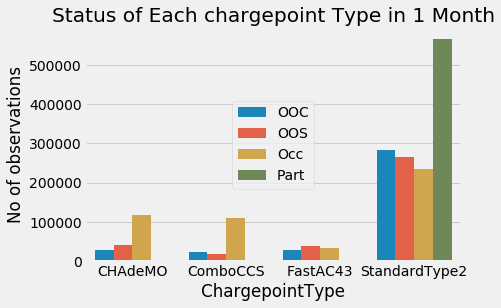

In [106]:
sns.barplot(x = 'ChargepointType',y = 'Count',hue = 'Status',data = chas)
plt.legend(loc= "center")
plt.title('Status of Each chargepoint Type in 1 Month')
plt.ylabel('No of observations')

#### Observations:-
- As most of the charge points are of standardtype,hence you have highest number of charge point out of service.
- Also in FastAC43, we have more number of chargepoints out of Service more than occupied.
- ComboCCs chargepoints are less in out of service.
- In standard type most of the charge points are in "out of contact" status.

## Sample chargepoint going out of Service in how many days?

In [107]:
sta1 = data[data['ChargepointID']  == 'CP:C9QKW']

In [108]:
stagr = pd.DataFrame(sta1.groupby(['Date','Status'])['Status'].count())

In [109]:
stagr.columns = ['Count']
stagr = stagr.reset_index()
stagr['Date'] = stagr['Date'].astype(str)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

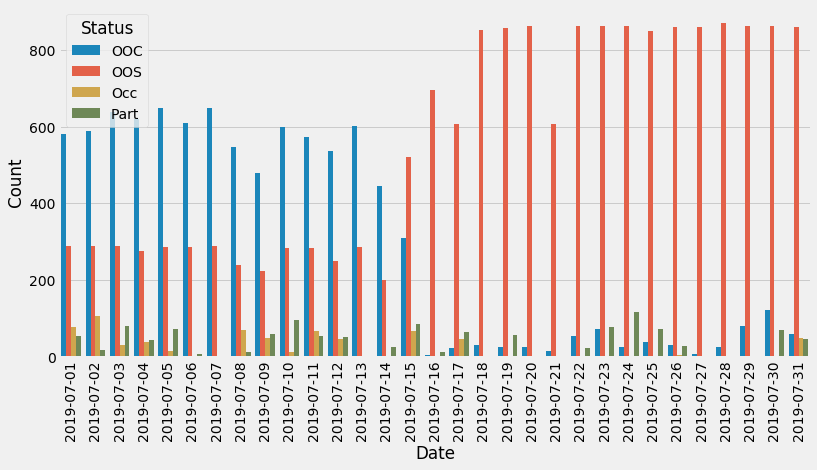

In [110]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Date',y = 'Count',hue = 'Status',data =stagr)
plt.xticks(rotation = 90)

#### Observations:-
- we can see that upto 15th of aug chargepoint is in Out of Contact, and suddenly after 15 Aug we can see that the charging point went out of Service status.

#### Data dict

- **CHAdeMO** = CHAdeMO is an abbreviation of "CHArge de MOve", equivalent to "move using charge" or "move by charge" or "charge 'n' go", a reference to the fact that it's a fast charger.[here](https://en.wikipedia.org/wiki/CHAdeMO)
- **ComboCCS** = Combined Charging system.[here](https://en.wikipedia.org/wiki/Combined_Charging_System), [img](https://st4.depositphotos.com/14025338/20531/v/1600/depositphotos_205319588-stock-illustration-electric-car-charging-plug-type.jpg)
- **Standardtype2** = type2 connector [here](https://en.wikipedia.org/wiki/Type_2_connector),  [img](https://upload.wikimedia.org/wikipedia/commons/b/bd/Iec-type2-ccs-combo2-and-iec-type2-charging-connectors-side-by-side.jpg)

#### Status:-
- **OOS**:- out of service
- **OOC**:- out of contact
- **Part**:- Partially occupied
- **occ**:- Fully occupied

### Data set from [here](http://www.cpinfo.ie/data/archive.html) and Data dict [here](http://www.mlopt.com/?p=6598)